## CB Model TYR KO Optimization

SBML: iMM904SL_v6 

Environmental Conditions {GLC: (-10.0,999999.0), O2: (-12.25,100000.0)}

Maximum candidate size: 30

Maximum number of iterations: 500 (50000 evaluations)

NSGAII (inspyred) / SPEA2 (JMetalPy)


In [16]:
from parse_results import Parser
import pandas as pd

BIOMASS_ID = 'R_biomass_SC5_notrace'
PRODUCT_ID = 'R_EX_tyr_L_e_'
O2 = 'R_EX_o2_e_'
GLC = 'R_EX_glc_e_'
envcond = {GLC: (-10.0,999999.0), O2: (-12.25,100000.0)}

In [17]:
parser = Parser(['BPCY','WYIELD','Target'])
data, idx = parser.parse_results('/home/vmsapereira/Results/Tyr/SBM/mo')

In [18]:
df = pd.DataFrame(data,columns = parser.obj_labels,index = idx)
df.describe()

,BPCY,WYIELD,Target,Size
count,685.000000,685.000000,685.000000,685.000000
mean,0.012780,3.080435,3.104543,25.547445
std,0.006625,0.836425,0.820076,4.763670
min,0.000134,0.791781,0.791795,14.000000
25%,0.008170,2.402916,2.480424,22.000000
50%,0.013473,3.028081,3.050511,28.000000
75%,0.015629,3.530585,3.532285,30.000000
max,0.035483,4.938237,4.938286,30.000000


In [19]:
from reframed.io.sbml import load_cbmodel
model = load_cbmodel('models/iMM904SL_v6.xml', flavor='cobra')

data_fba, data_lmoma = parser.compute_fluxes(model,BIOMASS_ID,[PRODUCT_ID,GLC],envcond = envcond)
print('Wild Type Biomass:', parser.wt_biomass)

Wild Type Biomass: 0.5978589478767857


In [20]:
df_fba = pd.DataFrame(data_fba, columns=['Biomass_pFBA','Tyr_pFBA','Glc_pFBA'],index = idx)
df_lmoma = pd.DataFrame(data_fba, columns=['Biomass_lMOMA','Tyr_lMOMA','Glc_lMOMA'],index = idx)

In [23]:
df_all = df.join(df_fba).join(df_lmoma)

# Carbon yield
df_all['CYIELD'] = df_all['Tyr_pFBA'] * 9 / (abs(df_all['Glc_pFBA']) * 6) 

df_all.sort_values(by='BPCY',ascending=False).head(20)

,BPCY,WYIELD,Target,Size,Biomass_pFBA,Tyr_pFBA,Glc_pFBA,Biomass_lMOMA,Tyr_lMOMA,Glc_lMOMA,CYIELD
292,0.035483,0.791781,0.791795,28,0.433482,0.789972,-10.000000,0.433482,0.789972,-10.000000,0.118496
1,0.033190,1.624587,1.624603,23,0.455102,1.624441,-9.997622,0.455102,1.624441,-9.997622,0.243724
2,0.033111,1.624587,1.624603,21,0.455102,1.624441,-9.997622,0.455102,1.624441,-9.997622,0.243724
0,0.033111,1.624587,1.624603,20,0.455102,1.624441,-9.997622,0.455102,1.624441,-9.997622,0.243724
532,0.031710,1.704548,1.704565,28,0.438636,1.704394,-10.000000,0.438636,1.704394,-10.000000,0.255659
533,0.031621,1.725355,1.725372,28,0.443990,1.725200,-10.000000,0.443990,1.725200,-10.000000,0.258780
531,0.031453,1.753621,1.753639,29,0.432146,1.753463,-10.000000,0.432146,1.753463,-10.000000,0.263019
293,0.031376,0.793983,0.793986,28,0.434682,0.792361,-10.000000,0.434682,0.792361,-10.000000,0.118854
530,0.031146,1.774448,1.774465,30,0.437278,1.774288,-10.000000,0.437278,1.774288,-10.000000,0.266143
523,0.030786,1.964533,1.964553,30,0.384831,1.964356,-10.000000,0.384831,1.964356,-10.000000,0.294653


In [22]:
# The KO solutions with best CYIELD
print(parser.results[422][1],"\n")
print(parser.results[303][1],"\n")
print(parser.results[383][1],"\n")
print(parser.results[385][1],"\n")
print(parser.results[329][1],"\n")

['R_SERt2m', 'R_2MPPALt', 'R_PSP_L', 'R_ALATA_L', 'R_NFORTYRt', 'R_FTHFLi', 'R_BPNT', 'R_SUCFUMtm', 'R_NADH2_u6m', 'R_PHEt2r', 'R_MGSA', 'R_PACALDt', 'R_ASPTA', 'R_VALt2m', 'R_NADH2_u6cm', 'R_FUM', 'R_PDHm', 'R_ALDD2ym', 'R_ATPM', 'R_PC', 'R_AKGDbm', 'R_GAM6Pt', 'R_EX_leu_L_e_', 'R_MDHm', 'R_PPA', 'R_SUCD3_u6m', 'R_4ABZt', 'R_ATPH1', 'R_ACACT1m', 'R_AHSERL2'] 

['R_FAS100', 'R_SUCD2_u6m', 'R_LALDO3', 'R_ICDHym', 'R_HMGCOAtm', 'R_ICDHxm', 'R_3MOPtm', 'R_TYRTAi', 'R_EX_4abz_e_', 'R_GLCGSD', 'R_PPYRDC', 'R_ADK1m', 'R_NDPK3', 'R_PSERT', 'R_PYK', 'R_PYRDC', 'R_FUM', 'R_E4Ptm', 'R_PDHm', 'R_ATPM', 'R_AKGDam', 'R_THRD_L', 'R_GLUDyi', 'R_ABTA', 'R_MDHm', 'R_FAS140COA', 'R_PSERDm_SC', 'R_TKT2', 'R_GHMT2r', 'R_ADK1'] 

['R_FUM', 'R_E4Ptm', 'R_PDHm', 'R_FAS100', 'R_SUCD2_u6m', 'R_ATPM', 'R_LALDO3', 'R_ICDHym', 'R_HMGCOAtm', 'R_ICDHxm', 'R_3MOPtm', 'R_TYRTAi', 'R_AKGDam', 'R_EX_4abz_e_', 'R_MDHm', 'R_ABTA', 'R_GLUDyi', 'R_FBP', 'R_FAS140COA', 'R_ADK1', 'R_PSERDm_SC', 'R_GLCGSD', 'R_PPYRDC', 'R_ADK

In [9]:
# KO reactions statistics
parser.reaction_stats()

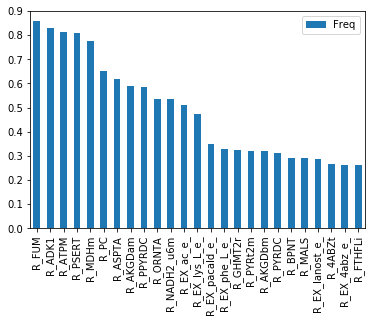

In [14]:
stat= list(zip(*parser.stats.items()))
import numpy as np 
pd.DataFrame(np.array(stat[1])/df_all.shape[0],index=stat[0], columns =['Freq']).sort_values(by='Freq',ascending=False).head(25).plot.bar()